In [74]:
import pandas as pd
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import spacy

In [75]:
# Load the nou_hearings

nou_hearings = pd.read_csv('../../dataset/nou_hearings.csv')

# Sample of the data

nou_hearings_sample = nou_hearings.sample(50).reset_index(drop=True)
nou_hearings_sample

,actor,text,date,actor_label
0,Vestfold fylkeskommune,2. Staten må tildele tilstrekkelige ressurser ...,27.02.2024,Offentlig forvaltning
1,Norges Rederiforbund,Rederiforbundets medlemmer ønsker å drive frem...,28.02.2024,Interessegruppe
2,Grimstad kommune,Grimstad kommune vil spesielt understreke at:-...,12.02.2024,Offentlig forvaltning
3,Innlandet fylkeskommune,7. Fylkeskommunens skal gjennom sin rolle som ...,27.02.2024,Offentlig forvaltning
4,Elkem ASA,Hydrogenproduksjon i Norge bør baseres på Norg...,26.01.2024,Bedrift
5,Riksantikvaren,Kortreiste byggevarer har lavere karbonavtrykk...,20.02.2024,Offentlig forvaltning
6,Norges Bilbransjeforbund,"Det trengs langsiktige, forutsigbare utbygging...",25.01.2024,Interessegruppe
7,Energigass Norge,Energigass Norge deler utvalgets overordnede s...,28.02.2024,Interessegruppe
8,Person som ikke har oppgitt navn (140397),Utvalget skriver også at lave energipriser ikk...,23.02.2024,Privatperson
9,Person som ikke har oppgitt navn (318803),Nå er det på tide at en setter seg inn i det s...,31.10.2023,Privatperson


In [76]:

import token


nlp = spacy.load('nb_core_news_md')

# Tokenize the text
def preprocess_text(text):
    
    doc = nlp(text.lower())
    tokens = [token.text for token in doc]
    return tokens


nlp = spacy.load('nb_core_news_md')


tokenized_docs = [preprocess_text(doc) for doc in nou_hearings_sample["text"]]

tagged_docs = [TaggedDocument(words=doc, tags=[str(i)]) for i, doc in enumerate(tokenized_docs)]

model = Doc2Vec(vector_size=100, window=2, min_count=1, workers=4, epochs=40)
model.build_vocab(tagged_docs)
model.train(tagged_docs, total_examples=model.corpus_count, epochs=model.epochs)

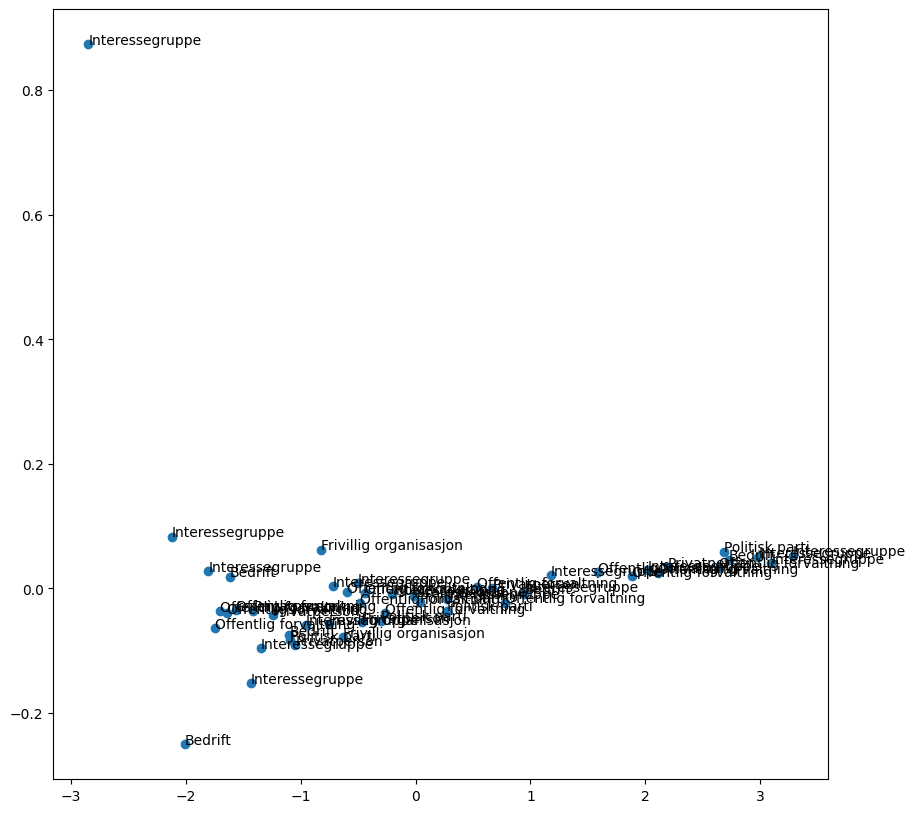

In [77]:
# Visualize the embeddings

doc_vectors = [model.infer_vector(doc) for doc in tokenized_docs]

pca = PCA(n_components=2)
doc_vec_2d = pca.fit_transform(doc_vectors)

plt.figure(figsize=(10, 10))
plt.scatter(doc_vec_2d[:, 0], doc_vec_2d[:, 1])

for i, actor in enumerate(nou_hearings_sample["actor_label"]):
    plt.annotate(actor, (doc_vec_2d[i, 0], doc_vec_2d[i, 1]))

## LSA

In [78]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import spacy

In [79]:
# Get stopwords
nlp = spacy.load('nb_core_news_md')
stopwords = nlp.Defaults.stop_words

print(stopwords)


{'ikke', 'du', 'har', 'gi', 'så', 'plass', 'vant', 'først', 'tatt', 'mener', 'bli', 'vil', 'kroner', 'kampen', 'hadde', 'ingen', 'opplyser', 'neste', 'var', 'viser', 'sin', 'får', 'over', 'mål', 'etter', 'til', 'skulle', 'jeg', 'måtte', 'ja', 'mellom', 'gang', 'ville', 'folk', 'disse', 'fra', 'gjennom', 'blir', 'litt', 'kveld', 'gikk', 'tror', 'står', 'man', 'utenfor', 'de', 'også', 'må', 'vår', 'inn', 'enn', 'gjøre', 'her', 'flere', 'igjen', 'like', 'bris', 'mennesker', 'nok', 'god', 'allerede', 'alle', 'fram', 'få', 'kontakt', 'andre', 'fjor', 'nå', 'sitt', 'siste', 'å', 'sier', 'dem', 'hun', 'helt', 'selv', 'poeng', 'svært', 'kunne', 'fikk', 'gå', 'tok', 'rundt', 'ham', 'et', 'i', 'bedre', 'and', 'la', 'runde', 'sammen', 'seg', 'kort', 'av', 'fire', 'komme', 'det', 'en', 'ned', 'viktig', 'er', 'se', 'mens', 'landet', 'mer', 'alt', 'om', 'den', 'første', 'dette', 'fortsatt', 'men', 'noen', 'når', 'ut', 'seks', 'fem', 'kommer', 'blant', 'for', 'videre', 'både', 'der', 'han', 'satt', '

In [80]:
corpus = nou_hearings_sample["text"]

vecotorizer = TfidfVectorizer(stop_words=list(stopwords))
X = vecotorizer.fit_transform(corpus)

lsa = TruncatedSVD(n_components=2, random_state=42)
lsa_matrix = lsa.fit_transform(X)

lsa_matrix = pd.DataFrame(lsa_matrix, columns=["component_1", "component_2"])
lsa_matrix = pd.concat([lsa_matrix, nou_hearings_sample["actor"]], axis=1)
lsa_matrix

,component_1,component_2,actor
0,0.088983,-0.029958,Vestfold fylkeskommune
1,0.174898,-0.064723,Norges Rederiforbund
2,0.267767,-0.020966,Grimstad kommune
3,0.094333,0.031951,Innlandet fylkeskommune
4,0.311850,-0.285879,Elkem ASA
5,0.036106,-0.031418,Riksantikvaren
6,0.085049,-0.040852,Norges Bilbransjeforbund
7,0.303868,0.010320,Energigass Norge
8,0.151630,-0.094813,Person som ikke har oppgitt navn (140397)
9,0.139082,-0.184952,Person som ikke har oppgitt navn (318803)


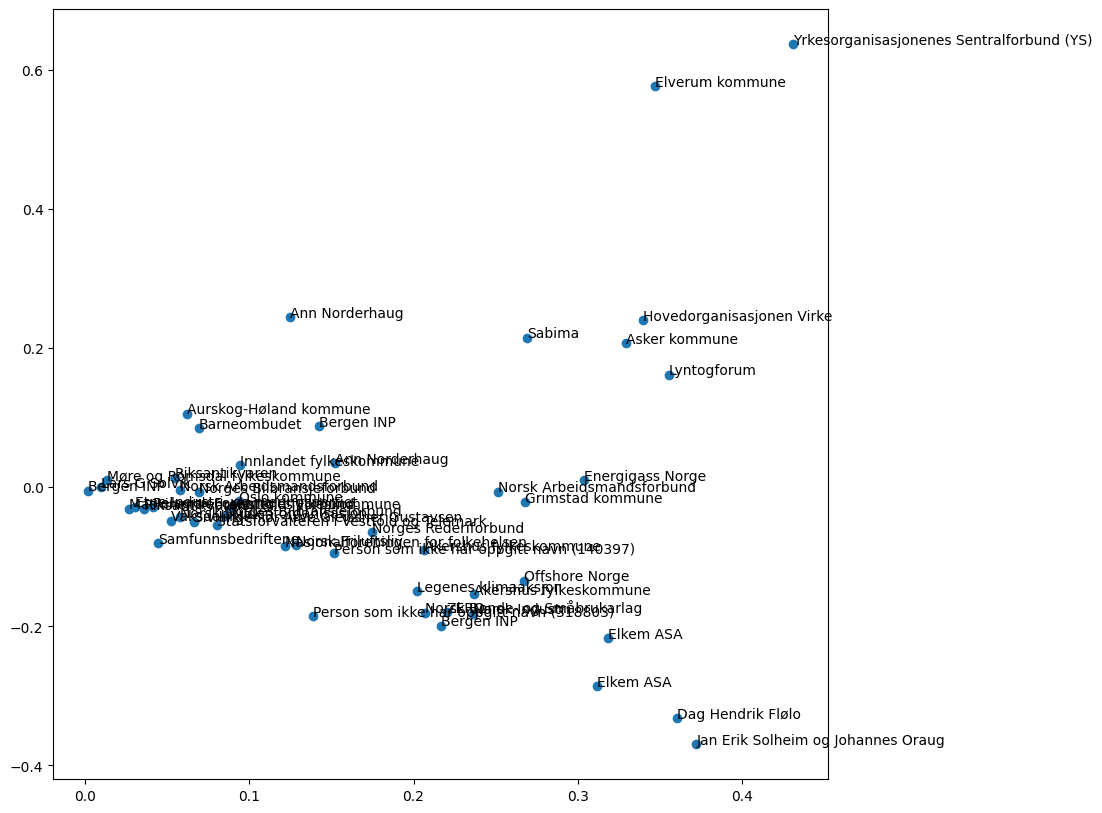

In [81]:
# Visualize the embeddings
plt.figure(figsize=(10, 10))
plt.scatter([lsa_matrix["component_1"]], [lsa_matrix["component_2"]])

for i, actor in enumerate(lsa_matrix["actor"]):
    plt.annotate(actor, (lsa_matrix["component_1"][i], lsa_matrix["component_2"][i]))